In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
from wafer_plot import draw_wafer_plot

warnings.filterwarnings('ignore')

In [27]:
p_current = Path().resolve().parent
data_path = p_current / 'results' / 'ring_data' / 'pdk_crr_test_cells_reliability_spectra'

volts = np.arange(0, 3.1, 0.2)

data_dir_gen = sorted(data_path.glob(f'reticle28/*.json'))
for dir in data_dir_gen:
    df = pd.read_json(dir)
    ret = df['reticle'][2]

    wavel = df['wavelength'][2]
    thrus = df['transmission_ch1'][2]
    drops = df['transmission_ch2'][2]
    volts = df['smu_voltage'][2]

print(len(volts))
print(len(thrus))
print(len(drops))

16
16
16


Text(0, 0.5, 'Transmission (dB)')

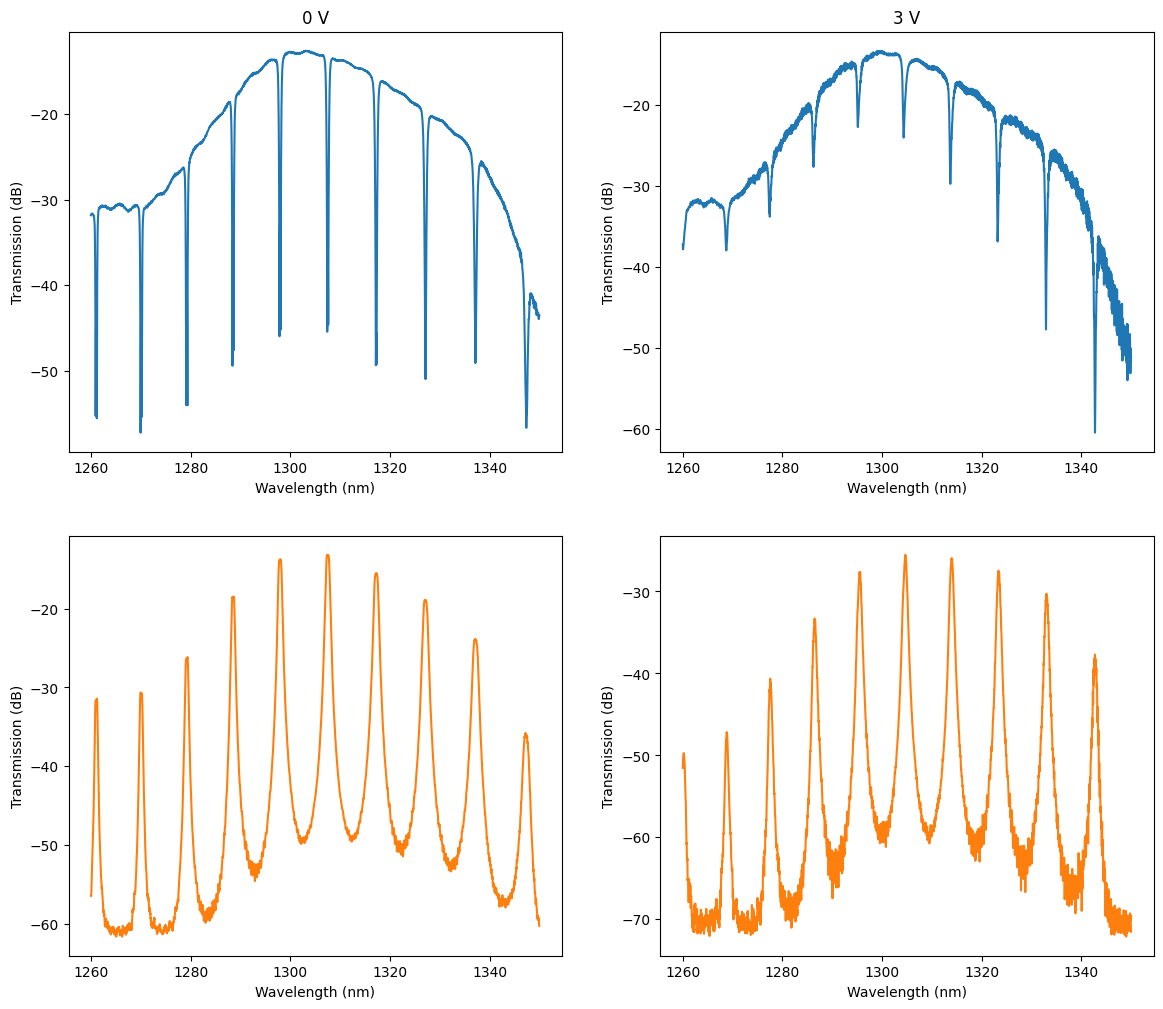

In [42]:
# compare CRR spectra
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
xlim = [[1306, 1309], [1303, 1306]]
ylim = [-50, -10]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
ax = axes[0][0]
ax.plot(wavel, thrus[0], color=colors[0], label='thru')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.set_title('0 V')
# ax.set_xlim(xlim[0])
# ax.set_ylim(ylim)

ax = axes[0][1]
ax.plot(wavel, thrus[-1], color=colors[0], label='thru')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.set_title('3 V')
# ax.set_xlim(xlim[1])
# ax.set_ylim(ylim)

ax = axes[1][0]
ax.plot(wavel, drops[0], color=colors[1], label='drop')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
# ax.set_xlim(xlim[0])
# ax.set_ylim(ylim)

ax = axes[1][1]
ax.plot(wavel, drops[-1], color=colors[1], label='drop')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
# ax.set_xlim(xlim[-1])
# ax.set_ylim(ylim)
